In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = np.loadtxt("faces.dat", unpack=True) # Load data
data = np.transpose(data)
print(data.shape)
print(data)

(400, 4096)
[[ 75.  83.  83. ...  42.  40.  38.]
 [110. 108. 120. ...  35.  33.  37.]
 [ 77.  75.  65. ...  37.  38.  37.]
 ...
 [121. 119. 113. ...  41.  45.  46.]
 [ 52.  49.  51. ... 143. 144. 146.]
 [125. 125. 125. ...  96.  91.  93.]]


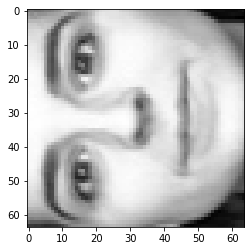

In [3]:
# Display 100th imag
plt.imshow(data[99].reshape(64,64), cmap='gray')
plt.show()

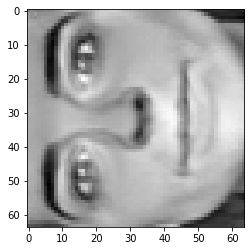

In [4]:
# Remove mean 
means = data.mean(axis=0)
centered_data = data - means

# Display 100th image
plt.imshow(centered_data[99].reshape(64,64), cmap='gray')
plt.show()

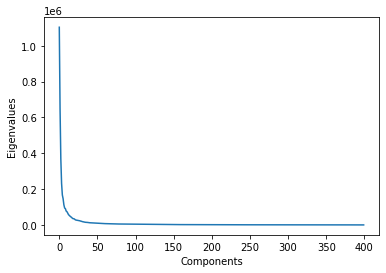

In [5]:
# Perform PCA
pca = PCA()
pca.fit(centered_data)
eig_vals = pca.explained_variance_

# Sort in descending order
# Eigenvalues are actually already sorted but 
# # this is how they would be sorted if they weren't
eig_vals = np.sort(eig_vals)[::-1]
components = np.arange(400)

# Plot
plt.plot(components, eig_vals)
plt.xlabel('Components')
plt.ylabel('Eigenvalues')
plt.show()

The final eigenvalue is 0 due to dimensionality reduction. This results in the final component having no more dimensions to remove, meaning that all variances have been accounted for and the only possible eigenvalue at this point is 0.

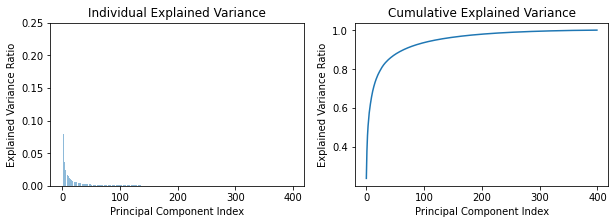

In [6]:
# Plot for e
variance = pca.explained_variance_ratio_

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 3)

ax1.bar(range(0,len(variance)), variance, alpha=0.5, align='center')
ax1.set_title('Individual Explained Variance')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_xlabel('Principal Component Index')

ax2.plot(range(0,len(np.cumsum(variance))), np.cumsum(variance))
ax2.set_title('Cumulative Explained Variance')
ax2.set_ylabel('Explained Variance Ratio')
ax2.set_xlabel('Principal Component Index')

plt.show()

Looking at the cumulative explained variance graph, we can see that the first 150 components account for most of the variance (about 90%). Therefore, the dimensionality of data we want to keep is 150 because these are accountable for a sufficient amount of variance. 

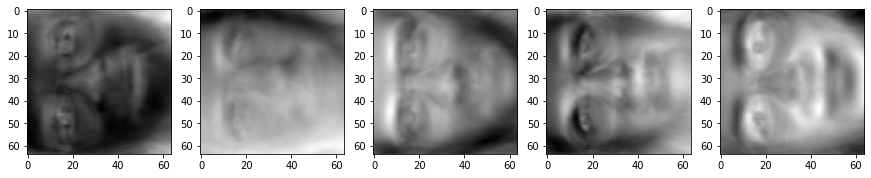

In [7]:
# Display top 5 leading eigenvectors
components = pca.components_

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_size_inches(15, 3)

ax1.imshow(components[0].reshape(64,64), cmap='gray')
ax2.imshow(components[1].reshape(64,64), cmap='gray')
ax3.imshow(components[2].reshape(64,64), cmap='gray')
ax4.imshow(components[3].reshape(64,64), cmap='gray')
ax5.imshow(components[4].reshape(64,64), cmap='gray')

plt.show()

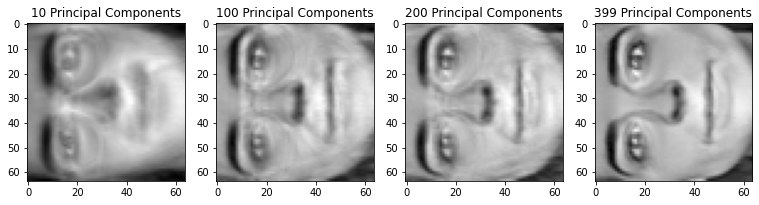

In [8]:
# Reconstruct using 10 components
pca_10 = PCA(n_components=10).fit(centered_data)
comps = pca_10.transform(centered_data)
reconstructed_10 = pca_10.inverse_transform(comps)

# Reconstruct using 100 components
pca_100 = PCA(n_components=100).fit(centered_data)
comps = pca_100.transform(centered_data)
reconstructed_100 = pca_100.inverse_transform(comps)

# Reconstruct using 200 components
pca_200 = PCA(n_components=200).fit(centered_data)
comps = pca_200.transform(centered_data)
reconstructed_200 = pca_200.inverse_transform(comps)

# Reconstruct using 399 components
pca_399 = PCA(n_components=399).fit(centered_data)
comps = pca_399.transform(centered_data)
reconstructed_399 = pca_399.inverse_transform(comps)

# Plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(13, 3)

ax1.imshow(reconstructed_10[99].reshape(64,64), cmap='gray')
ax1.set_title('10 Principal Components')
ax2.imshow(reconstructed_100[99].reshape(64,64), cmap='gray')
ax2.set_title('100 Principal Components')
ax3.imshow(reconstructed_200[99].reshape(64,64), cmap='gray')
ax3.set_title('200 Principal Components')
ax4.imshow(reconstructed_399[99].reshape(64,64), cmap='gray')
ax4.set_title('399 Principal Components')

plt.show()